# Part II - (Presentation Title)
## by (Owoseni Timileyin)


## Investigation Overview


- I could observe that the members ages are below age 60
-  male gender tends to use the bikeshare service more than the female gender and any other gender
-  it is observed that the highest trips happens to be between 8 am in the morning and 5(17)pm in the evening.
-  it can be seen that subscriber users are more than the customers 


## Dataset Overview

> Bike sharing is a mode of transportation that is enjoyable to use, convenient, inexpensive, and good for your health. It entails the use of a large number of bicycles with distinctive designs that are docked at a series of designated locations. Unlocked bikes can be returned to any other station in the system, even if they were originally rented from a different station. People utilize bike sharing for a variety of purposes, including commuting to work or school, running errands, and getting to appointments. The dataset utilized in this project contains the bike share 2019 records, which has about 183,412 observations and 16 features.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikeshare = pd.read_csv('fordgobikeshare.csv')
#printing just the first five columns of the dataset
bikeshare.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
clean_bikeshare = bikeshare.copy()

In [4]:
#1. The date column datatype should be changed to datetime datatype
clean_bikeshare['start_time'] = pd.to_datetime(clean_bikeshare['start_time'])
clean_bikeshare['end_time'] = pd.to_datetime(clean_bikeshare['end_time'])

In [5]:
#2. The date column should be splitted into hour, day, month and year.
clean_bikeshare['start_month_name']=clean_bikeshare['start_time'].dt.strftime('%B')
clean_bikeshare['start_month']=clean_bikeshare['start_time'].dt.month.astype(int)
clean_bikeshare['start_week']=clean_bikeshare['start_time'].dt.strftime('%a')
clean_bikeshare['start_day']=clean_bikeshare['start_time'].dt.day.astype(int)
clean_bikeshare['start_hour']=clean_bikeshare['start_time'].dt.hour

In [6]:
#3. The member_gender, user_type and the bike_share_for_all_trip datatype should be change to a categorical datatype
for col in ['member_gender', 'user_type', 'bike_share_for_all_trip']:
    clean_bikeshare[col] = clean_bikeshare[col].astype('category')

In [7]:
#4. The bike_id,start_station_id and the end_station_id should be changed to an object datatype.
for col in ['bike_id', 'start_station_id', 'end_station_id']:
    clean_bikeshare[col] = clean_bikeshare[col].astype('object')

In [8]:
#5. Calculate the members age by their birth_year information provided.
clean_bikeshare['Age'] = 2019 - clean_bikeshare['member_birth_year']

## (Visualization 1)

> What is the number of trips per hour in a day

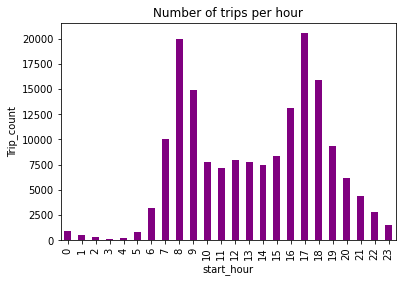

In [35]:
ax = clean_bikeshare['start_hour'].value_counts().sort_index()\
.plot(kind = 'bar',color ='purple',\
      title = "Number of trips per hour")
ax.set_xlabel("start_hour")
ax.set_ylabel("Trip_count")
plt.show()

## (Visualization 2)

-  What is number of trips per weekdays

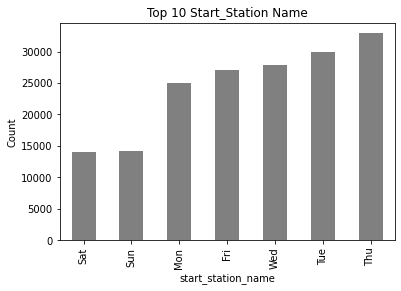

In [36]:
ax = clean_bikeshare['start_week'].value_counts().sort_values()\
.head(10)\
.plot(kind = 'bar', title = 'Top 10 Start_Station Name', color = 'grey',)
ax.set_xlabel('start_station_name')
ax.set_ylabel('Count')
plt.show()

## (Visualization 3)
- What is the count of the weekdays trip per gender

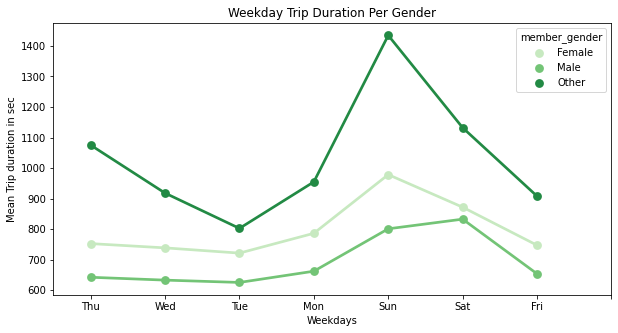

In [38]:
plt.figure(figsize=[10, 5])
sb.pointplot(data = clean_bikeshare, x = 'start_week', y = 'duration_sec', hue = 'member_gender', palette = 'Greens', ci=None)
plt.title('Weekday Trip Duration Per Gender')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.xticks(np.arange(0, 7 + 1, 1))
plt.show()

## (Visualization 4)
- What is the duration of trips per user_type

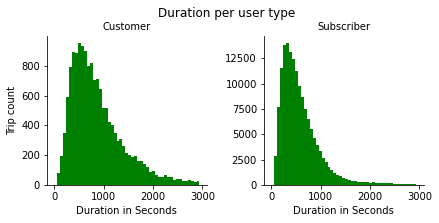

In [39]:
duration_user = sb.FacetGrid(clean_bikeshare, col="user_type", margin_titles=True,sharey = False)
binz = np.arange(0, 3000,60)
duration_user.map(plt.hist, "duration_sec",color="green", bins=binz)
duration_user.set_axis_labels("Duration in Seconds", "Trip count")
duration_user.set_titles(col_template = '{col_name}')
duration_user.fig.suptitle('Duration per user type', y=1.02);

In [33]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 366101 bytes to Part_II_slide_deck_template.slides.html
